In [7]:
import numpy as np
import jPCA
import matplotlib.pyplot as plt
from jPCA.util import load_churchland_data, plot_projections

In [8]:
n = 3
t = np.linspace(0, 10, n)
test = np.random.multivariate_normal(
    np.zeros(20),np.eye(20),(t.shape[0])
)

print(test.shape)

(3, 20)


In [9]:
# # Load publicly available data from Mark Churchland's group
# path = "exampleData.mat"
# datas, times = load_churchland_data(path)

# print(len(times))
# print(datas[0].shape)

# # Create a jPCA object
# jpca = jPCA.JPCA(num_jpcs=6)

n = 1000
t = np.linspace(0, 10, n)

datas = []

x = np.sin(t) + np.random.normal(0.1, 0.01, n)
y = np.cos(t) + np.random.normal(0.1, 0.01, n)
z = t + np.random.normal(0.1, 0.01, n)
tmp = [
    np.hstack(
        (np.array([x, y, z]).T, 
        np.random.multivariate_normal(
            np.zeros(20),np.eye(20),t.shape[0]
        ))
)]
# tmp = tmp + [np.zeros_like(tmp[0])] 
# tmp_0 = np.zeros_like(tmp)
    
print(len(tmp))
print(tmp[0].shape)


1
(1000, 23)


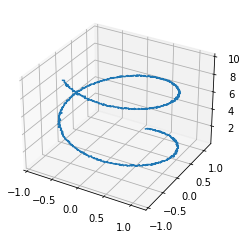

In [10]:
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot3D(x, y, z)

len(times) = 61
len(datas) = 108
datas[0].shape = (61, 218)
len(projected) = 108
projected[0].shape = (21, 4)


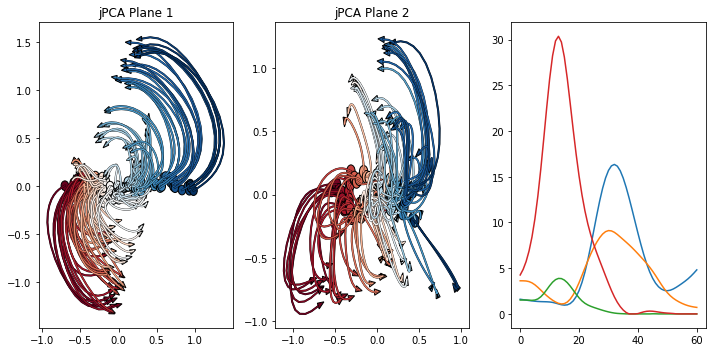

In [18]:
# Load publicly available data from Mark Churchland's group
path = "exampleData.mat"
datas, times = load_churchland_data(path)

print(f'len(times) = {len(times)}')
print(f'len(datas) = {len(datas)}')
print(f'datas[0].shape = {datas[0].shape}')

# Create a jPCA object
jpca = jPCA.JPCA(num_jpcs=4)

# Fit the jPCA object to data
(projected, 
 full_data_var,
 pca_var_capt,
 jpca_var_capt) = jpca.fit(datas, times=times, tstart=-50, tend=150)

print(f'len(projected) = {len(projected)}')
print(f'projected[0].shape = {projected[0].shape}')
# Plot the projected data
# x_idx and y_idx control which columns of the data are shown.
# For example, to plot the second jPCA plane, use x_idx=2, y_idx=3
fig, axes = plt.subplots(1, 3, figsize=(10, 5))
plot_projections(projected, axis=axes[0], x_idx=0, y_idx=1)
plot_projections(projected, axis=axes[1], x_idx=2, y_idx=3)

axes[0].set_title("jPCA Plane 1")
axes[1].set_title("jPCA Plane 2")
for i in range(4):
    axes[2].plot(datas[0][:,i])
plt.tight_layout()
plt.show()

In [3]:
# Here's how we would get the variance of first plane:
print("Variance captured by each jPC:")
jpca_var_capt / full_data_var

Variance captured by each jPC:


array([0.14174162, 0.14708453, 0.08170893, 0.07743372, 0.0919853 ,
       0.07063135])

In [4]:
# Example of getting the eigenvalues of M_skew
print("Eigenvalues of M_skew:")
np.round(np.linalg.eigvals(jpca.M_skew), 3)

Eigenvalues of M_skew:


array([ 0.+0.08j ,  0.-0.08j , -0.+0.048j, -0.-0.048j,  0.+0.008j,
        0.-0.008j])